In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import nltk
from string import punctuation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold,cross_val_score,train_test_split
from sklearn.feature_extraction import text
from sklearn.metrics import classification_report, accuracy_score


nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# **TASK 1 : Data Loading and Preparation**

In [2]:
#Loading the data
x_train = pd.read_csv('x_train.csv',  names=["Domain", "Review"])
y_train = pd.read_csv('y_train.csv', names = ["label"])
x_test = pd.read_csv('x_test.csv',  names=["Domain", "Review"])
y_test = pd.read_csv('y_test.csv', names = ["label"])

print("-------------------------------------------------------------------")
print("================= Printing reviews of train set ===================")
print("-------------------------------------------------------------------")
print(x_train['Review'])


#Checking for empty rows
print("-------------------------------------------------------------------")
print("==================== Checking for Empty Rows ======================")
print("-------------------------------------------------------------------")
empty = []
for i in range(2399):
    if not x_train['Review'][i]:
        empty.append(i)
print(empty)


#Changing the reviews to lowercase
print("-------------------------------------------------------------------")
print("=============== Changing the reviews to lowercase =================")
print("-------------------------------------------------------------------")
x_train_clean = x_train["Review"].str.lower()

print(x_train_clean)




# Removing Punctuations from the reviews
print("-------------------------------------------------------------------")
print("========== Removing Punctuatuations from the reviews ==============")
print("-------------------------------------------------------------------")
for i in range(2399):
  reviews_punctuation_removed = ""
  words = x_train_clean[i]
    
  for char in words:
    if char not in punctuation:
      reviews_punctuation_removed = reviews_punctuation_removed + char
  
  x_train_clean[i] = reviews_punctuation_removed

print(x_train_clean)

x_train["Review"] = x_train_clean

#Printing Test Review Data
print("-------------------------------------------------------------------")
print("=================== Printing Test Review Data =====================")
print("-------------------------------------------------------------------")
print(x_test['Review'])



# Dropping the rows with empty reviews
print("-------------------------------------------------------------------")
print("============== Dropping the rows with empty reviews ===============")
print("-------------------------------------------------------------------")
empty = []
for i in range(600):
    if not x_test['Review'][i]:
        empty.append(i)
print(empty)



#Changing the reviews to lowercase
print("-------------------------------------------------------------------")
print("=============== Changing the reviews to lowercase =================")
print("-------------------------------------------------------------------")
x_test_clean = x_test["Review"].str.lower()
print(x_test_clean)


#Removing punctuations from test review dataset
print("-------------------------------------------------------------------")
print("========== Removing Punctuatuations from the reviews ==============")
print("-------------------------------------------------------------------")
for i in range(600):
  reviews_punctuation_removed = ""
  words = x_test_clean[i]
    
  for char in words:
    if char not in punctuation:
      reviews_punctuation_removed = reviews_punctuation_removed + char
  
  x_test_clean[i] = reviews_punctuation_removed

print(x_test_clean)


x_test["Review"] = x_test_clean

#Removing Duplicates from train and test review dataset
print("--------------------------------------------------------------------------------")
print("========== Removing Duplicates from train and test review dataset ==============")
print("--------------------------------------------------------------------------------")

print("Duplicate data in train set", x_train.duplicated().sum())
print("Duplicate data in test set", x_test.duplicated().sum())

train_duplicates = x_train[x_train.duplicated()]
for i in train_duplicates.index:
  x_train = x_train.drop(i)
  y_train = y_train.drop(i)

test_duplicates = x_test[x_test.duplicated()]
for i in test_duplicates.index:
  x_test = x_test.drop(i)
  y_test = y_test.drop(i)


x_train.reset_index(drop=True)
y_train.reset_index(drop=True)
x_test.reset_index(drop=True)
y_test.reset_index(drop=True)


#After Removing Duplicates from train and test review dataset
print("--------------------------------------------------------------------------------------")
print("========== After Removing Duplicates from train and test review dataset ==============")
print("--------------------------------------------------------------------------------------")

print("Train Data Set")
print(x_train['Review'])
print('')
print('')
print('')
print("Test Data Set")
print(x_test['Review'])



-------------------------------------------------------------------
================= Printing reviews of train set ===================
-------------------------------------------------------------------
0       Oh and I forgot to also mention the weird colo...
1                            THAT one didn't work either.
2                                      Waste of 13 bucks.
3       Product is useless, since it does not have eno...
4       None of the three sizes they sent with the hea...
                              ...                        
2395    The sweet potato fries were very good and seas...
2396    I could eat their bruschetta all day it is dev...
2397                                 Ambience is perfect.
2398    We ordered the duck rare and it was pink and t...
2399         Service was good and the company was better!
Name: Review, Length: 2400, dtype: object
-------------------------------------------------------------------
==================== Checking for Empty Rows ===

# **TASK 2: Feature Representation**

In [3]:
#BoW Representation using Tf-idf technique
vectorizer = text.TfidfVectorizer(min_df=2,
                             sublinear_tf=True,
                             use_idf=True,
                             binary=True,
                             ngram_range = (1, 2),
                             stop_words = text.ENGLISH_STOP_WORDS)


X_train_vectors = vectorizer.fit_transform(x_train['Review'])
X_test_vectors = vectorizer.transform(x_test['Review'])

print("-------------------------------------------------------------------")
print("============ Printing Feature Size (Vocabulary Size) ==============")
print("-------------------------------------------------------------------")
print ("X_train() Features Size: ", len(X_train_vectors.toarray()[0]))
print ("X_test() Features Size: ", len(X_test_vectors.toarray()[0]))



-------------------------------------------------------------------
============ Printing Feature Size (Vocabulary Size) ==============
-------------------------------------------------------------------
X_train() Features Size:  2080
X_test() Features Size:  2080


# **TASK 3: Classification and Evaluation**

In [4]:
#Splitting Train set into train (75%) and validation (25%9) set
X_TRAIN, X_VAL, Y_TRAIN, Y_VAL = train_test_split(X_train_vectors, y_train, random_state=45, test_size = 0.25)

# Using Logistic Regression Machine Learning Model for sentiment classification
LR = LogisticRegression()

#Performing Hyperparmeter Tuning and cross-validation

# Create regularization solver space
solvers = ['newton-cg', 'lbfgs', 'liblinear']
# Create regularization penalty space
penalty = ['l2']
# Create regularization hyperparameter space
c_values = np.logspace(0, 4, 20)
# Create hyperparameter options
hyperparameters = dict(solver=solvers,penalty=penalty,C=c_values)

#Using RepeatedStratifiedKFold perform 10 splits for cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

#Finding the Best Values of hyperparameters using GridSearchCV
clf = GridSearchCV(estimator=LR, param_grid=hyperparameters, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)


#Fitting the model with Training dataset and labels
best_model = clf.fit(X_TRAIN, Y_TRAIN)

#Printing the best Hyperparameters value found using GridSearchCV Hyperparameter tuning
print("------------------------------------------------------------------------------------------------------")
print("======= Printing best Solver, C and Penalty parameter value found from hyperparameter tuning =========")
print("------------------------------------------------------------------------------------------------------")
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])
print('Best Solver:', best_model.best_estimator_.get_params()['solver'])

print("----------------------------------------------------------------------------------------------")
print("=============== Printing 4-fold cross validation f1 scores and mean f1 score  ================")
print("----------------------------------------------------------------------------------------------")
k_fold = RepeatedStratifiedKFold(n_splits=4, n_repeats=1, random_state=1)
scores = cross_val_score(best_model, X_TRAIN, Y_TRAIN.values.ravel(), cv=k_fold,scoring='accuracy')
print('Cross-Validation Accuracy Scores', scores)
scores = pd.Series(scores)
print('Mean Cross-Validation Accuracy Score', scores.mean())

#Predicting sentiments for test dataset
best_model_val = best_model.predict(X_VAL)

#Printing the classification report and accuracy of model
print("-----------------------------------------------------------------------------------------")
print("============ Printing classification report of model on validation dataset ==============")
print("-----------------------------------------------------------------------------------------")
print("Logistic Regression Accuracy Score on Validation dataset :  ",accuracy_score(best_model_val, Y_VAL)*100)
print (classification_report(Y_VAL, best_model_val))

#Saving the predictions on test dataset to  test labels dataframe
print("-------------------------------------------------------------------------------------------")
print("============ Saving the predictions on val dataset to val labels dataframe ==============")
print("-------------------------------------------------------------------------------------------")
Y_VAL['Predicted'] = best_model_val
Y_VAL['Correct'] = (Y_VAL['label'] == Y_VAL['Predicted'])
print(Y_VAL)



#Predicting sentiments for test dataset
best_model_pred = best_model.predict(X_test_vectors)

#Printing the classification report and accuracy of model
print("-------------------------------------------------------------------")
print("============ Printing classification report of model ==============")
print("-------------------------------------------------------------------")
print("Logistic Regression Accuracy Score on Test dataset :  ",accuracy_score(best_model_pred, y_test)*100)
print (classification_report(y_test, best_model_pred))


#Saving the predictions on test dataset to  test labels dataframe
print("-------------------------------------------------------------------------------------------")
print("============ Saving the predictions on test dataset to test labels dataframe ==============")
print("-------------------------------------------------------------------------------------------")
x_test['label'] = y_test['label']
x_test['Predicted'] = best_model_pred
x_test['Correct'] = (x_test['label'] == x_test['Predicted'])
x_test["Review_len"] = x_test["Review"].str.split(" ").str.len()
print(x_test)



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


------------------------------------------------------------------------------------------------------
======= Printing best Solver, C and Penalty parameter value found from hyperparameter tuning =========
------------------------------------------------------------------------------------------------------
Best Penalty: l2
Best C: 2.636650898730358
Best Solver: liblinear
----------------------------------------------------------------------------------------------
=============== Printing 4-fold cross validation f1 scores and mean f1 score  ================
----------------------------------------------------------------------------------------------
Cross-Validation Accuracy Scores [0.79147982 0.83408072 0.81165919 0.79372197]
Mean Cross-Validation Accuracy Score 0.8077354260089685
-----------------------------------------------------------------------------------------
============ Printing classification report of model on validation dataset ==============
-------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


# **Visualisations**

------------------------------------------------------------------------------
============ Displaying the correct predictions on val dataset  ==============
------------------------------------------------------------------------------


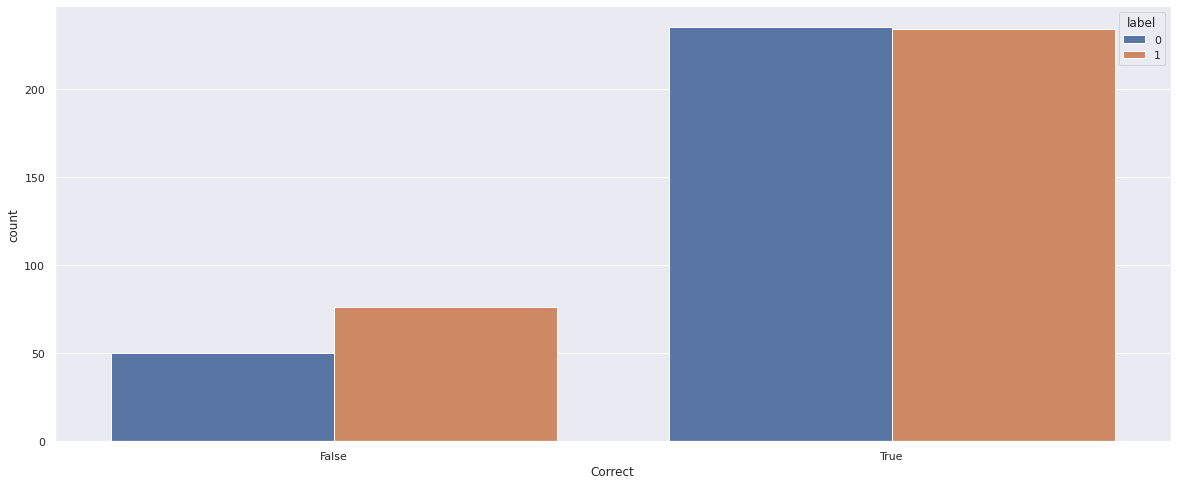

In [9]:
#Displaying the correct predictions on val dataset 
print("------------------------------------------------------------------------------")
print("============ Displaying the correct predictions on val dataset  ==============")
print("------------------------------------------------------------------------------")

sns.countplot(x="Correct", hue='label', data=Y_VAL)
sns.set(rc={'figure.figsize':(8,8)})

-------------------------------------------------------------------------------
============ Displaying the correct predictions on test dataset  ==============
-------------------------------------------------------------------------------


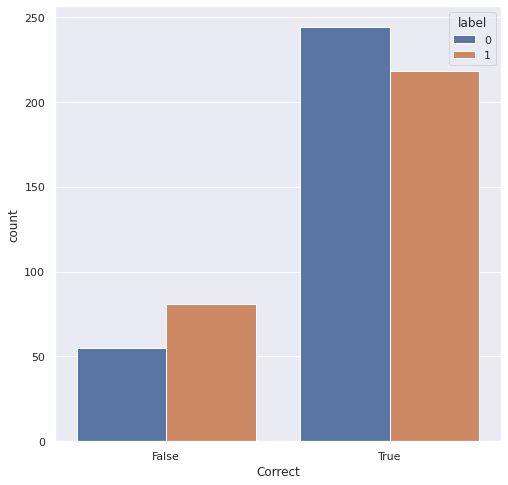

In [6]:
#Displaying the correct predictions on test dataset 
print("-------------------------------------------------------------------------------")
print("============ Displaying the correct predictions on test dataset  ==============")
print("-------------------------------------------------------------------------------")

sns.countplot(x="Correct", hue='label', data=x_test)
sns.set(rc={'figure.figsize':(8,8)})

----------------------------------------------------------------------------------------------------
============ Displaying the correct predictions on different domains on test dataset  ==============
----------------------------------------------------------------------------------------------------


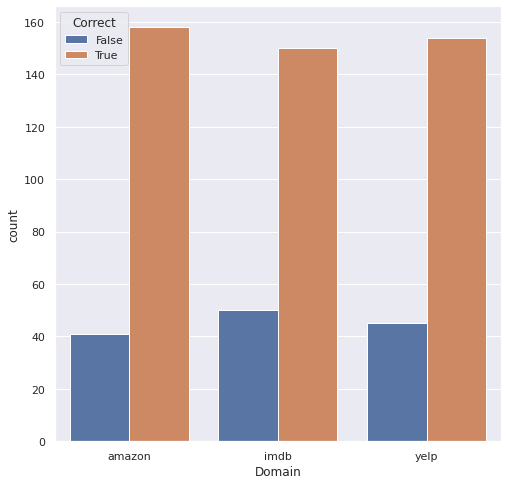

In [7]:
#Displaying the correct predictions on different domains on test dataset
print("----------------------------------------------------------------------------------------------------")
print("============ Displaying the correct predictions on different domains on test dataset  ==============")
print("----------------------------------------------------------------------------------------------------")

sns.countplot(x="Domain", hue='Correct', data=x_test)
sns.set(rc={'figure.figsize':(8,8)})

--------------------------------------------------------------------------------------------------------------
============ Displaying the correct predictions on different length of reviews on test dataset  ==============
--------------------------------------------------------------------------------------------------------------


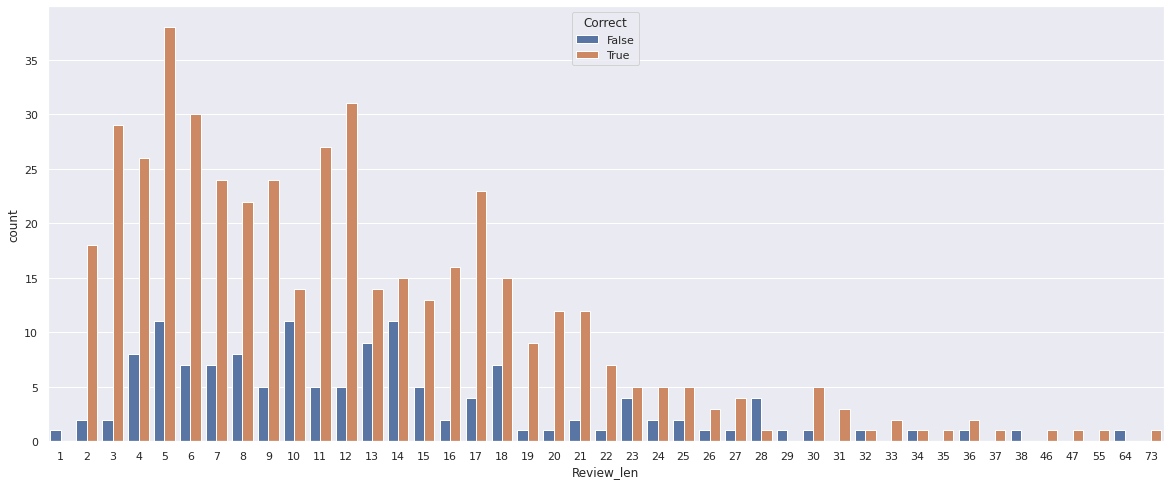

In [11]:
#Displaying the correct predictions on different length of reviews on test dataset
print("--------------------------------------------------------------------------------------------------------------")
print("============ Displaying the correct predictions on different length of reviews on test dataset  ==============")
print("--------------------------------------------------------------------------------------------------------------")

sns.countplot(x="Review_len", hue='Correct', data=x_test)
sns.set(rc={'figure.figsize':(20,8)})